# Insurance Forecast (NOT FINISHED, FOLLOW THE KEYS TO END WITH A MORE COMPLETE NOTEBOOK)

**Dataset** https://www.kaggle.com/datasets/mirichoi0218/insurance/

**Keys**
- https://www.kaggle.com/code/hely333/eda-regression
- https://www.kaggle.com/code/jasonlzdong/medical-costs-linear-regression
- https://www.geeksforgeeks.org/steps-for-mastering-exploratory-data-analysis-eda-steps/
- https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas

**Exploratory Data Analysis** (EDA) is a powerful method that allows analysts, scientists, and researchers to gain complete knowledge of their data earlier than projecting formal modeling or speculation testing. It is an iterative procedure that entails summarizing, visualizing, and exploring information to find patterns, anomalies, and relationships that might not be apparent at once.

## 0. Understand the problem and the data

## 1. Import and inspect the data

Once you have a clear understanding of the problem and data, the next step is to **import the data** into your analysis environment. During this step, it's crucial to **examine the data** to understand its structure, variable types, and potential issues.

Here are some tasks to perform:
- **Load the data** into your analysis environment, ensuring it is imported correctly without errors or truncations.
- **Examine the size** of the data (number of rows and columns) to understand its complexity.
- **Identify data types** and formats for each variable, as this will be important for future manipulation and analysis.
- **Check for inconsistencies**, such as invalid values, mismatched units, or outliers that may indicate issues with the data.

In [41]:
import tensorflow as tf
import keras as tfk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # This disables GPU

### 1.1 Load the data

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1.2 Examine the size

In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance.memory_usage()

Index         132
age         10704
sex         10704
bmi         10704
children    10704
smoker      10704
region      10704
charges     10704
dtype: int64

### 1.3 Identify data types

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1.4 Check for inconsistencies

In [6]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Step 2. Handling missing values

## Step 3: Perform Data Transformation

In [79]:
insurance_one_hot = pd.get_dummies(insurance, drop_first=True) #drop_first avoid redundancy

## Step 4: Visualize Data Relationships

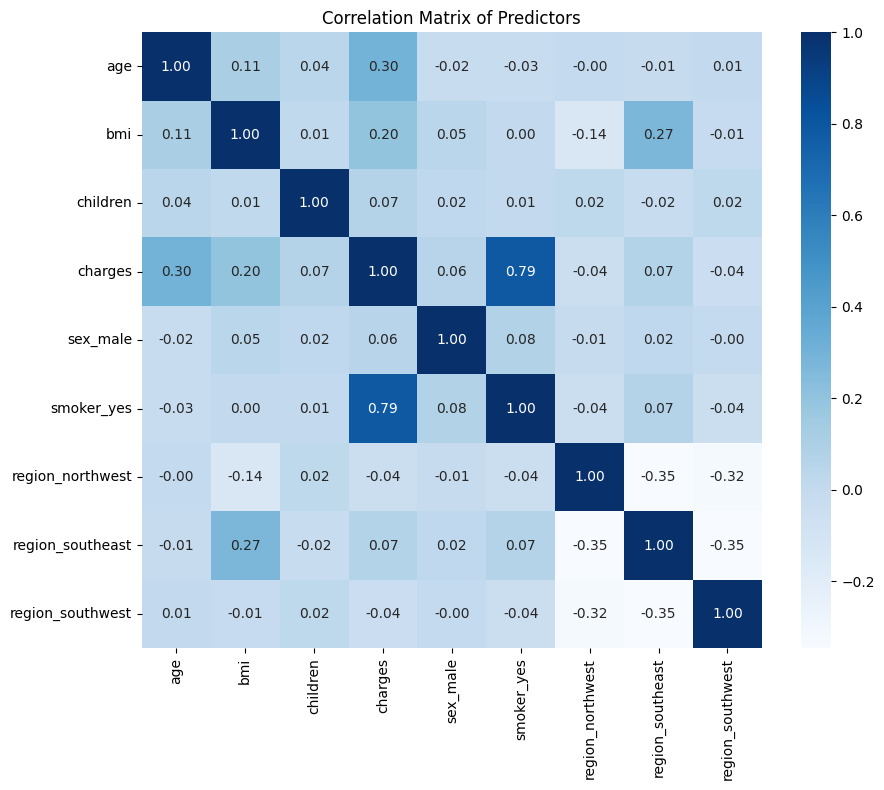

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_one_hot.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix of Predictors')
plt.show()

A strong correlation is observed only with the fact of **smoking** the patient

### Step 4.1 Univariate Analysis

This analysis focuses on a single variable. **Histograms** and density plots are typically used to visualize the distribution.

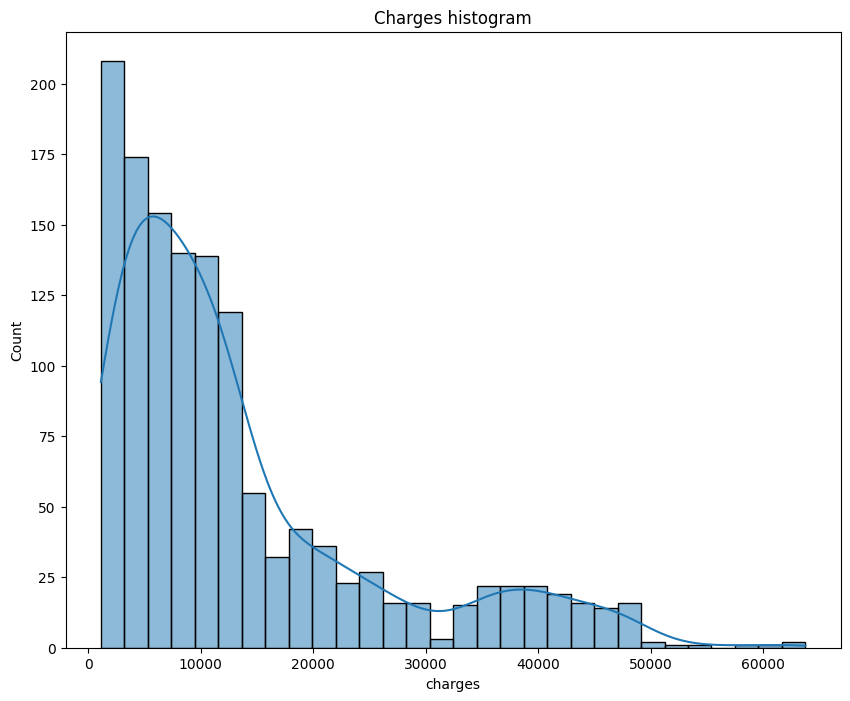

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(insurance['charges'], bins=30, kde=True)
plt.title("Charges histogram")
plt.show()

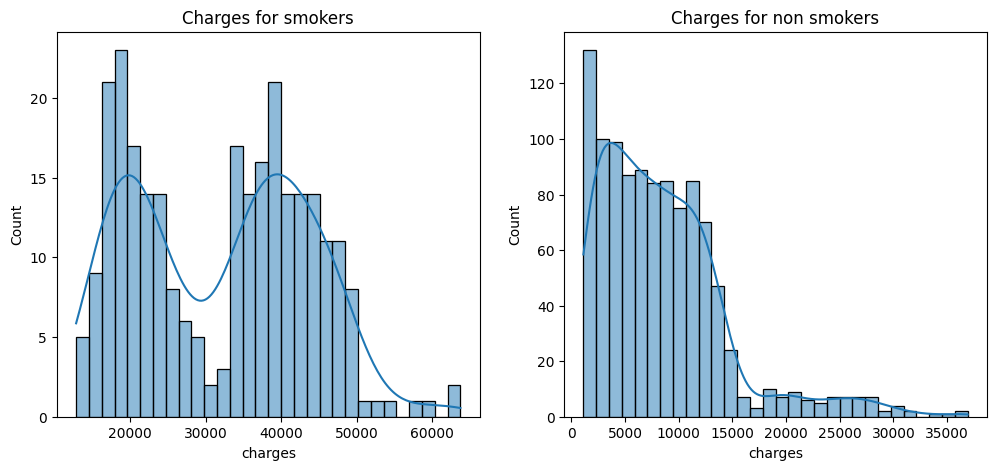

In [12]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.histplot(insurance[(insurance.smoker=="yes")]['charges'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Charges for smokers")

sns.histplot(insurance[(insurance.smoker=="no")]['charges'], bins=30, kde=True)
axes[1].set_title("Charges for non smokers")
plt.show()

Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater.

### 4.2 Bivariate analysis

<Figure size 1000x800 with 0 Axes>

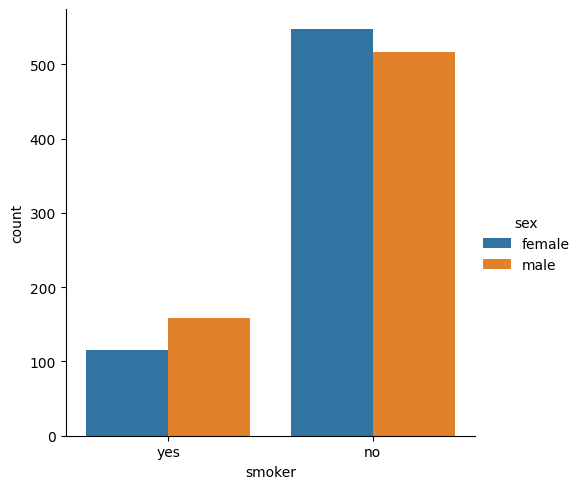

In [13]:
plt.figure(figsize=(10,8))
sns.catplot(data=insurance,x="smoker", hue="sex", kind="count")
plt.show()

<Figure size 1000x800 with 0 Axes>

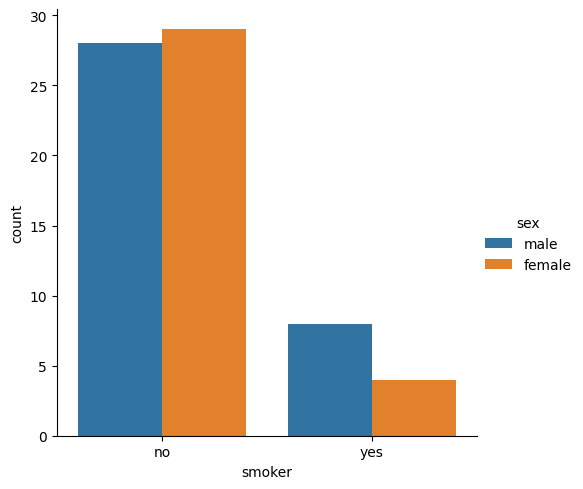

In [14]:
plt.figure(figsize=(10,8))
sns.catplot(data=insurance[(insurance.age == 18)],x="smoker", hue="sex", kind="count")
plt.show()

<Axes: xlabel='charges', ylabel='smoker'>

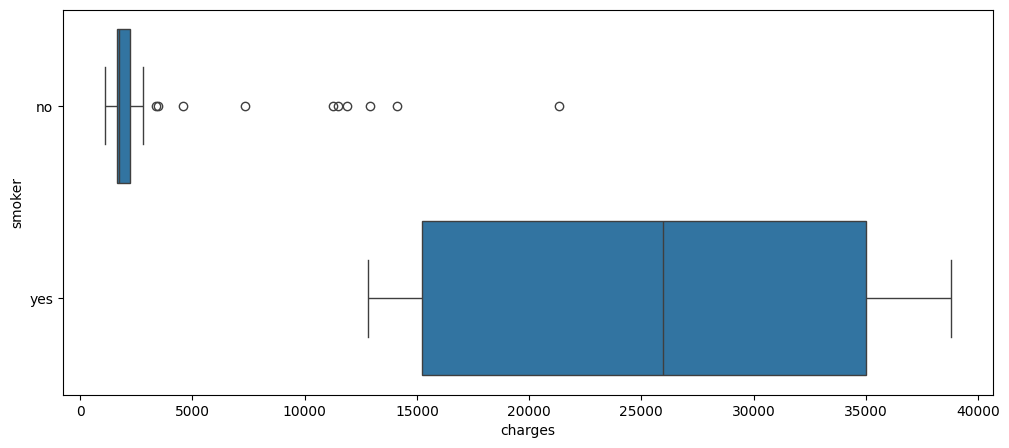

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(x="charges",y="smoker",data=insurance[insurance.age==18])

# Step 3: Build the model

## Step 3.1: Preprocessing the data

- https://www.simplilearn.com.cach3.com/normalization-vs-standardization-article.html

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
	(MinMaxScaler(), ["age", "bmi", "children"]),
	(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [61]:
dlr = tfk.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.8, min_lr=1e-12, patience=5)

model = tfk.Sequential([
    tfk.layers.Dense(1)
])

#compile the model
model.compile(optimizer=tfk.optimizers.Adam(learning_rate=1.0), loss="mae", )

#fit the data
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=2000, callbacks=[dlr])

Epoch 1/2000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12460.9746 - val_loss: 10373.3887 - learning_rate: 1.0000
Epoch 2/2000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10344.6953 - val_loss: 8599.7246 - learning_rate: 1.0000
Epoch 3/2000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8935.8506 - val_loss: 7615.3921 - learning_rate: 1.0000
Epoch 4/2000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7699.6475 - val_loss: 7274.5981 - learning_rate: 1.0000
Epoch 5/2000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7763.8760 - val_loss: 7190.3774 - learning_rate: 1.0000
Epoch 6/2000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7334.2349 - val_loss: 7153.7349 - learning_rate: 1.0000
Epoch 7/2000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7566.6362 - val_loss: 7117.6128 - learning_rate: 1.0000
Epoch 8/2000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7852.9453 - val_loss: 7078.8848 - learning_rate: 1.0000
Epoch 9/2000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7388.8535

In [63]:
from sklearn.metrics import r2_score

# Supongamos que ya tienes tu modelo entrenado y x_test, y_test definidos
y_pred_tf = model.predict(X_test)
r2_tf = r2_score(y_test, y_pred_tf)
print("R² del modelo TensorFlow:", r2_tf * 100)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R² del modelo TensorFlow: 68.57557056535347


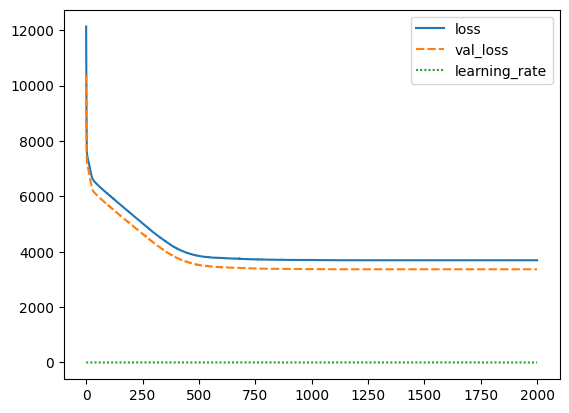

In [64]:
plt.Figure([10,8])
sns.lineplot(history.history)
plt.show()